<h1 style="text-align:center">Problem 6.21</h1>
<h3 style="text-align:center">MCHE 513: Intermediate Dynamics</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>`

The problem asks to form the equations of motion for an unbalanced rolling cylinder, with eccentricity $\epsilon$ and radius $R$. There is enough friction such that pure rolling (no slip) is maintained. The system is sketched in Figure 1.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/rolling_imbalanced_Prob6p21.png" alt="Rolling Cylinder with Imbalance" width=50%><br>
    <strong>Figure 1: Rolling Cylinder with Imbalance</strong>
</p>

In [1]:
# Import the SymPy Module
import sympy

# Import the necessary sub-modules and methods for dynamics
from sympy.physics.mechanics import dynamicsymbols, inertia
from sympy.physics.mechanics import LagrangesMethod, Lagrangian
from sympy.physics.mechanics import Particle, Point, ReferenceFrame, RigidBody

# initiate better printing of SymPy results
sympy.init_printing()

In [2]:
# Define the generalized coordinates - just 1DOF here
theta = dynamicsymbols('theta')
theta_dot = dynamicsymbols('theta', 1)

# Define the other symbols needed
R, e, m, g, Izz = sympy.symbols('R epsilon m g I_{zz}')

In [3]:
# Define the Newtonian reference frame
N = ReferenceFrame('N')

# Define a body-fixed frame along the pendulum, with y aligned from m to the pin
P = N.orientnew('P', 'Axis', [-theta, N.z])

# Define the point at the center of the cylinder and set its velocity
A = Point('A')
A.set_vel(N, R * theta_dot * N.x) # Pure rolling

In [4]:
# Locate the center of mass relative to the cylinder center
G = A.locatenew('G', -e * (sympy.sin(theta) * N.x + sympy.cos(theta) * N.y))

# Define its velocity, working from the velocity of point A - needed for kinetic energy calculation
G.v2pt_theory(A, N, P)

In [5]:
# Create the inertia diadic for the cylinder. 
# Since the system is planar, set Ixx and Iyy to zero for simplicity
Ic = inertia(P, 0, 0, Izz)

# Define the cylinder as a rigid body
cylinder = RigidBody('cylinder', G, P, m, (Ic, G))

# Define the potential energy of the cyliner - just gravity here
cylinder.set_potential_energy(-m * g * e * sympy.cos(theta))

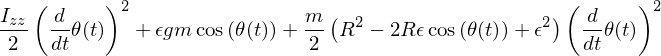

In [6]:
# Form the Lagrangian, then simplify and print
L = Lagrangian(N, cylinder)
L.simplify()

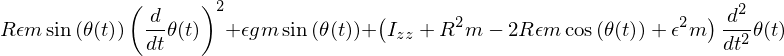

In [7]:
# create an instance of the LagrangesMethod class
LM = LagrangesMethod(L, [theta])

# Form the equations of motion, then simplify and print
eq_of_motion = LM.form_lagranges_equations()
sympy.collect(sympy.simplify(eq_of_motion)[0], theta)

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [8]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())